### 实现梯度下降
##### 基于pytorch

#### 1.定义函数

In [1]:
def f(x,y):
    return x**2 + y**2

#### 2.定义输入

In [9]:
import torch
x = torch.tensor([1.1], requires_grad=True)
y = torch.tensor([2.1], requires_grad=True)
n = 100 # 迭代次数
lr = 0.1 # 学习率

### 3.梯度下降

In [ ]:
def gradient_descent(x, y, lr, n):
    for i in range(n):
        z = f(x, y) # 计算函数值
        z.backward() # 计算z关于x和y的梯度

        x.data -= lr * x.grad.data # 更新x
        y.data -= lr * y.grad.data # 更新y
        x.grad.data.zero_() # 清零x的梯度
        y.grad.data.zero_() # 清零y的梯度
        print(f'After {i+1} iteration:'
            f'x = {x.item():.4f} '
            f'y = {y.item():.4f} '
            f'f(x, y) = {z.item():.4f})
    return x, y


In [ ]:

gradient_descent(x, y, lr, n)

After 1 iteration:x = 0.8800 y = 1.6800 f(x, y) = 5.6200
After 2 iteration:x = 0.7040 y = 1.3440 f(x, y) = 3.5968
After 3 iteration:x = 0.5632 y = 1.0752 f(x, y) = 2.3020
After 4 iteration:x = 0.4506 y = 0.8602 f(x, y) = 1.4732
After 5 iteration:x = 0.3604 y = 0.6881 f(x, y) = 0.9429
After 6 iteration:x = 0.2884 y = 0.5505 f(x, y) = 0.6034
After 7 iteration:x = 0.2307 y = 0.4404 f(x, y) = 0.3862
After 8 iteration:x = 0.1845 y = 0.3523 f(x, y) = 0.2472
After 9 iteration:x = 0.1476 y = 0.2819 f(x, y) = 0.1582
After 10 iteration:x = 0.1181 y = 0.2255 f(x, y) = 0.1012
After 11 iteration:x = 0.0945 y = 0.1804 f(x, y) = 0.0648
After 12 iteration:x = 0.0756 y = 0.1443 f(x, y) = 0.0415
After 13 iteration:x = 0.0605 y = 0.1154 f(x, y) = 0.0265
After 14 iteration:x = 0.0484 y = 0.0924 f(x, y) = 0.0170
After 15 iteration:x = 0.0387 y = 0.0739 f(x, y) = 0.0109
After 16 iteration:x = 0.0310 y = 0.0591 f(x, y) = 0.0070
After 17 iteration:x = 0.0248 y = 0.0473 f(x, y) = 0.0045
After 18 iteration:x = 

(tensor([2.2407e-10], requires_grad=True),
 tensor([4.2778e-10], requires_grad=True))

### 可视化

/var/folders/sg/79fnmv4x7xb7jlgtgjk6wfjr0000gn/T/ipykernel_77480/4250661120.py:46: UserWarning: Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sg/79fnmv4x7xb7jlgtgjk6wfjr0000gn/T/ipykernel_77480/4250661120.py:46: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sg/79fnmv4x7xb7jlgtgjk6wfjr0000gn/T/ipykernel_77480/4250661120.py:46: UserWarning: Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sg/79fnmv4x7xb7jlgtgjk6wfjr0000gn/T/ipykernel_77480/4250661120.py:46: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sg/79fnmv4x7xb7jlgtgjk6wfjr0000gn/T/ipykernel_77480/4250661120.py:46: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/sg/79fn

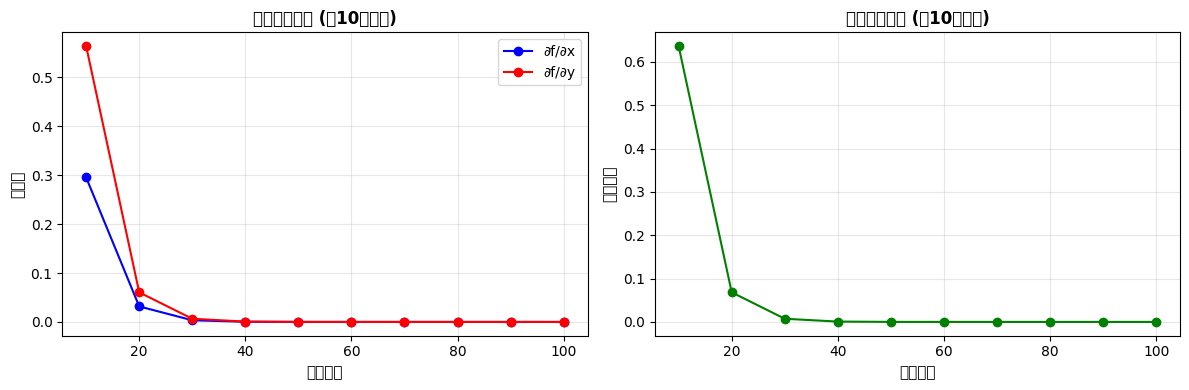

In [12]:
import matplotlib.pyplot as plt

# 重新初始化参数用于可视化
x_vis = torch.tensor([1.1], requires_grad=True)
y_vis = torch.tensor([2.1], requires_grad=True)

# 记录每10次迭代的梯度
gradient_history = {'iter': [], 'grad_x': [], 'grad_y': [], 'grad_norm': []}

for i in range(n):
    z = f(x_vis, y_vis)
    z.backward()
    
    # 每10次迭代记录一次梯度
    if (i + 1) % 10 == 0:
        gradient_history['iter'].append(i + 1)
        gradient_history['grad_x'].append(x_vis.grad.item())
        gradient_history['grad_y'].append(y_vis.grad.item())
        gradient_history['grad_norm'].append((x_vis.grad**2 + y_vis.grad**2).sqrt().item())
    
    # 参数更新
    x_vis.data -= lr * x_vis.grad.data
    y_vis.data -= lr * y_vis.grad.data
    x_vis.grad.zero_()
    y_vis.grad.zero_()

# 绘制梯度变化
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# 梯度分量变化
axes[0].plot(gradient_history['iter'], gradient_history['grad_x'], 'b-o', label='∂f/∂x', markersize=6)
axes[0].plot(gradient_history['iter'], gradient_history['grad_y'], 'r-o', label='∂f/∂y', markersize=6)
axes[0].set_xlabel('迭代次数', fontsize=11)
axes[0].set_ylabel('梯度值', fontsize=11)
axes[0].set_title('梯度分量变化 (每10次迭代)', fontsize=12, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 梯度范数变化
axes[1].plot(gradient_history['iter'], gradient_history['grad_norm'], 'g-o', markersize=6)
axes[1].set_xlabel('迭代次数', fontsize=11)
axes[1].set_ylabel('梯度范数', fontsize=11)
axes[1].set_title('梯度范数变化 (每10次迭代)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 重新初始化参数，记录优化轨迹
x_opt = torch.tensor([1.1], requires_grad=True)
y_opt = torch.tensor([2.1], requires_grad=True)

# 记录优化过程中的所有点
trajectory_x = [x_opt.item()]
trajectory_y = [y_opt.item()]

for i in range(n):
    z = f(x_opt, y_opt)
    z.backward()
    
    x_opt.data -= lr * x_opt.grad.data
    y_opt.data -= lr * y_opt.grad.data
    x_opt.grad.zero_()
    y_opt.grad.zero_()
    
    trajectory_x.append(x_opt.item())
    trajectory_y.append(y_opt.item())

# 创建网格用于绘制函数图像
x_range = np.linspace(-0.5, 2.5, 100)
y_range = np.linspace(-0.5, 2.5, 100)
X, Y = np.meshgrid(x_range, y_range)
Z = X**2 + Y**2

# 创建图表：等高线图 + 优化轨迹
fig, ax = plt.subplots(figsize=(10, 8))

# 绘制等高线
contour = ax.contour(X, Y, Z, levels=20, cmap='viridis', alpha=0.6)
ax.clabel(contour, inline=True, fontsize=8)

# 绘制优化轨迹
ax.plot(trajectory_x, trajectory_y, 'r-', linewidth=2, label='优化轨迹', alpha=0.7)
ax.plot(trajectory_x, trajectory_y, 'ro', markersize=4, alpha=0.6)

# 标记起始点和终点
ax.plot(trajectory_x[0], trajectory_y[0], 'go', markersize=12, label='起始点', zorder=5)
ax.plot(trajectory_x[-1], trajectory_y[-1], 'bs', markersize=12, label='终点', zorder=5)

# 标记最优点
ax.plot(0, 0, 'k*', markersize=20, label='最优点 (0,0)', zorder=5)

ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('梯度下降优化过程 - 等高线图', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# 创建3D表面图
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# 绘制3D表面
surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, edgecolor='none')

# 计算优化轨迹上的Z值
trajectory_z = [x_opt_val**2 + y_opt_val**2 for x_opt_val, y_opt_val in zip(trajectory_x, trajectory_y)]

# 绘制优化轨迹在3D空间中的路径
ax.plot(trajectory_x, trajectory_y, trajectory_z, 'r-', linewidth=3, label='优化轨迹')
ax.plot(trajectory_x, trajectory_y, trajectory_z, 'ro', markersize=3, alpha=0.5)

# 标记起始点和终点
ax.plot([trajectory_x[0]], [trajectory_y[0]], [trajectory_z[0]], 'go', markersize=12, label='起始点')
ax.plot([trajectory_x[-1]], [trajectory_y[-1]], [trajectory_z[-1]], 'bs', markersize=12, label='终点')

ax.set_xlabel('x', fontsize=11)
ax.set_ylabel('y', fontsize=11)
ax.set_zlabel('f(x,y)', fontsize=11)
ax.set_title('梯度下降优化过程 - 3D表面图', fontsize=13, fontweight='bold')
ax.legend(fontsize=11)

fig.colorbar(surf, ax=ax, label='函数值')
plt.tight_layout()
plt.show()